# load libraries

In [1]:
pip install catboost

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

#load Data

In [3]:
df = pd.read_csv(r"/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Data Exploration and Cleaning

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.shape

(545, 13)

In [7]:
df.sample(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
379,3633000,3520,3,1,1,yes,no,no,no,no,2,yes,unfurnished
307,4165000,4080,3,1,2,yes,no,no,no,no,2,no,semi-furnished
432,3290000,6060,3,1,1,yes,yes,yes,no,no,0,no,furnished


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [12]:
d = df.isnull().sum()
d [d > 0]

,0


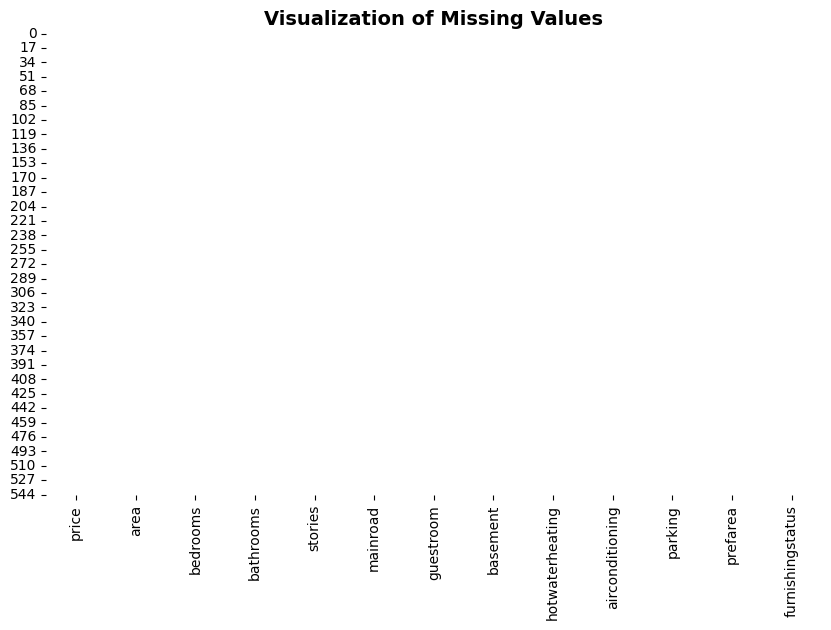

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="Reds", cbar=False, linewidths=0.5)
plt.title("Visualization of Missing Values", fontsize=14, fontweight="bold")
plt.show()

In [14]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

# Apply outlier detection to all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in numeric_columns}

for col, count in outlier_counts.items():
    print(f"Column {col} contains {count} outlier values.")

df_cleaned = df.copy()
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("\nOutliers removed, dataset size after cleaning:", df_cleaned.shape)

Column price contains 15 outlier values.
Column area contains 12 outlier values.
Column bedrooms contains 12 outlier values.
Column bathrooms contains 1 outlier values.
Column stories contains 41 outlier values.
Column parking contains 12 outlier values.

Outliers removed, dataset size after cleaning: (463, 13)


In [17]:
print(f"Before the rows",len(df))
print(f"After the rows",len(df_cleaned))

Before the rows 545
After the rows 463


# Data Analysis


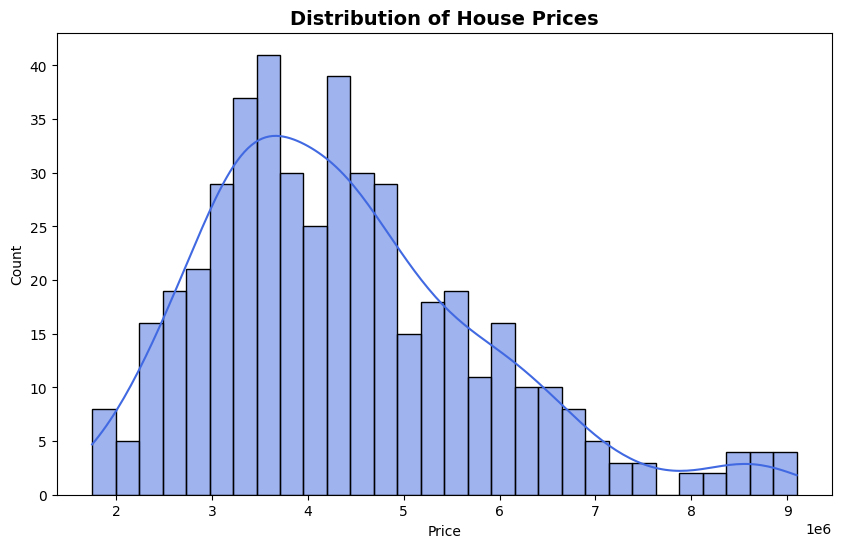

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of House Prices", fontsize=14, fontweight="bold")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

<ipython-input-19-2032957240>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['bedrooms'], y=df_cleaned['price'], palette="coolwarm")


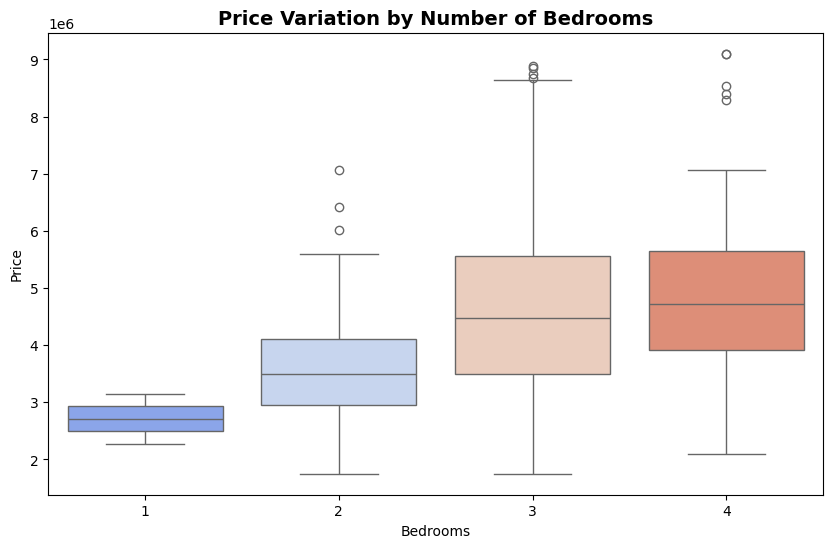

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['bedrooms'], y=df_cleaned['price'], palette="coolwarm")
plt.title("Price Variation by Number of Bedrooms", fontsize=14, fontweight="bold")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

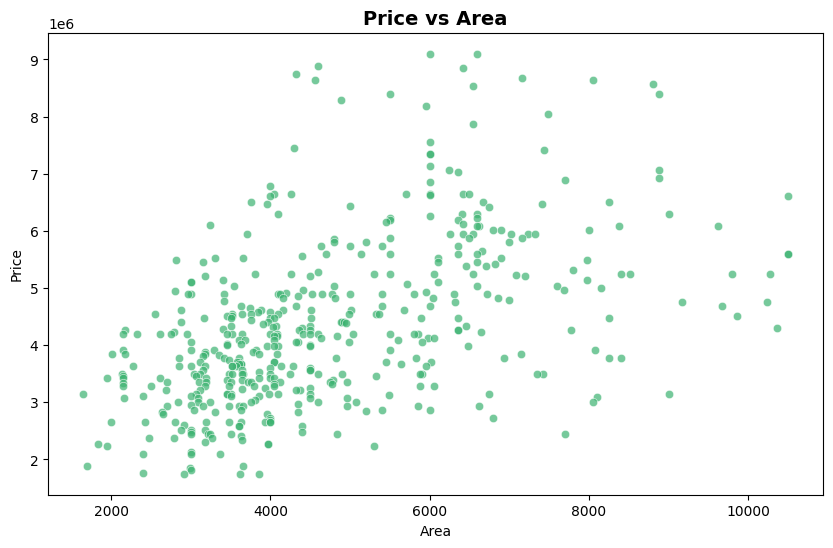

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['area'], y=df_cleaned['price'], color='mediumseagreen', alpha=0.7)
plt.title("Price vs Area", fontsize=14, fontweight="bold")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

<ipython-input-21-77667629>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airconditioning', y='price', data=df_cleaned, palette="viridis")


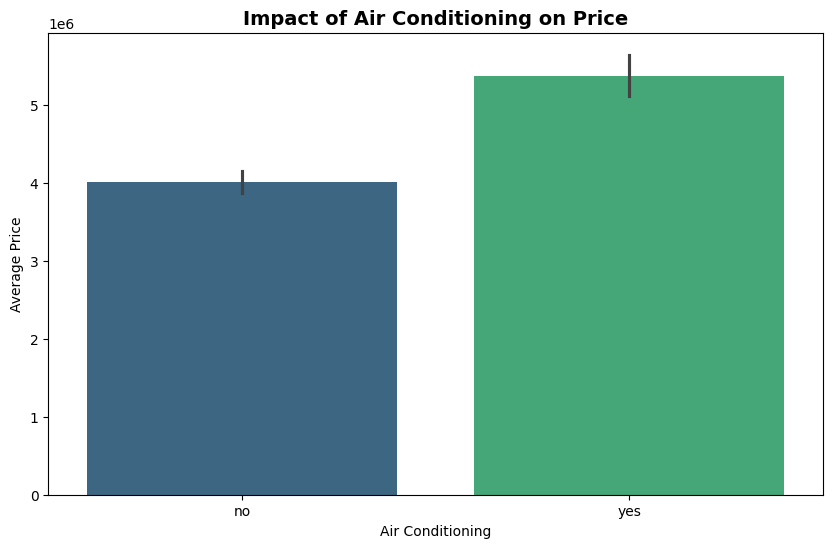

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='airconditioning', y='price', data=df_cleaned, palette="viridis")
plt.title("Impact of Air Conditioning on Price", fontsize=14, fontweight="bold")
plt.xlabel("Air Conditioning")
plt.ylabel("Average Price")
plt.show()

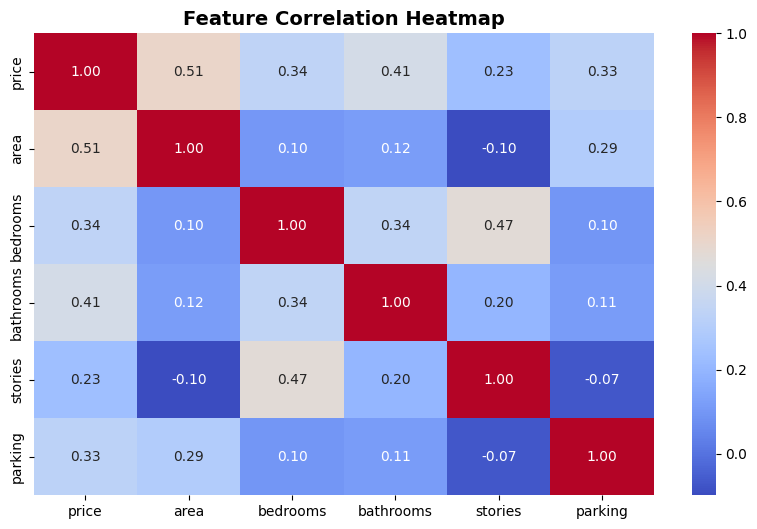

In [22]:
plt.figure(figsize=(10,6))
numeric_df = df_cleaned.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

<ipython-input-23-711782325>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='guestroom', y='price', data=df_cleaned, palette="pastel")


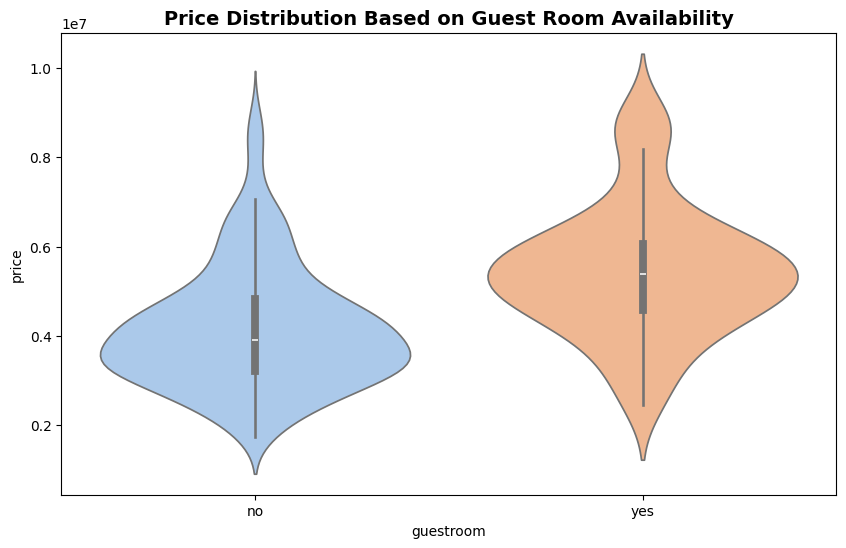

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(x='guestroom', y='price', data=df_cleaned, palette="pastel")
plt.title("Price Distribution Based on Guest Room Availability", fontsize=14, fontweight="bold")
plt.show()

<ipython-input-24-1555133104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parking', y='price', data=df_cleaned, palette="magma")


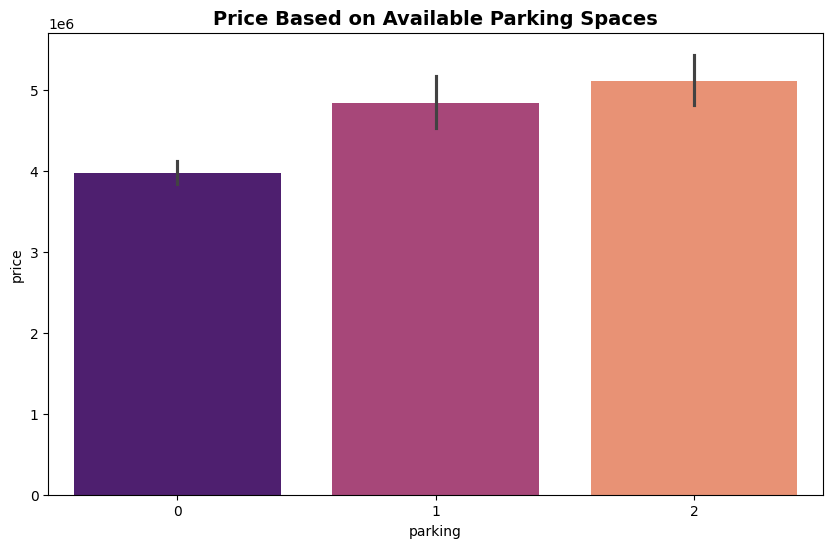

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='parking', y='price', data=df_cleaned, palette="magma")
plt.title("Price Based on Available Parking Spaces", fontsize=14, fontweight="bold")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

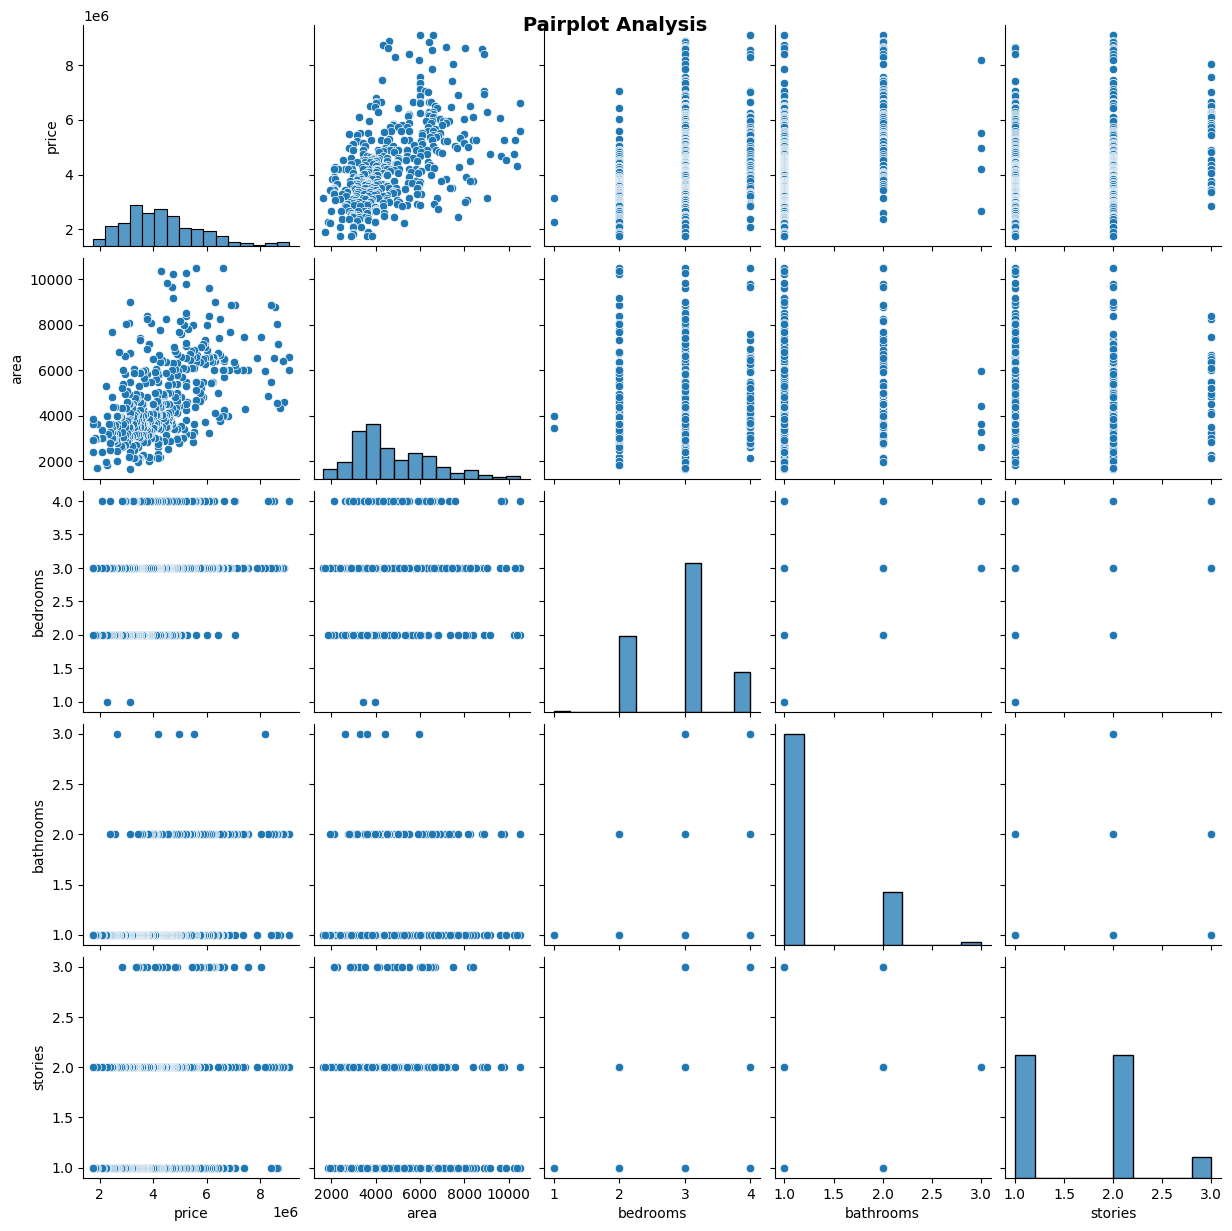

In [25]:
sns.pairplot(df_cleaned[['price', 'area', 'bedrooms', 'bathrooms', 'stories']], palette="husl")
plt.suptitle("Pairplot Analysis", fontsize=14, fontweight="bold")
plt.show()

<ipython-input-26-2136480297>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='furnishingstatus', y='price', data=df_cleaned, palette="deep")


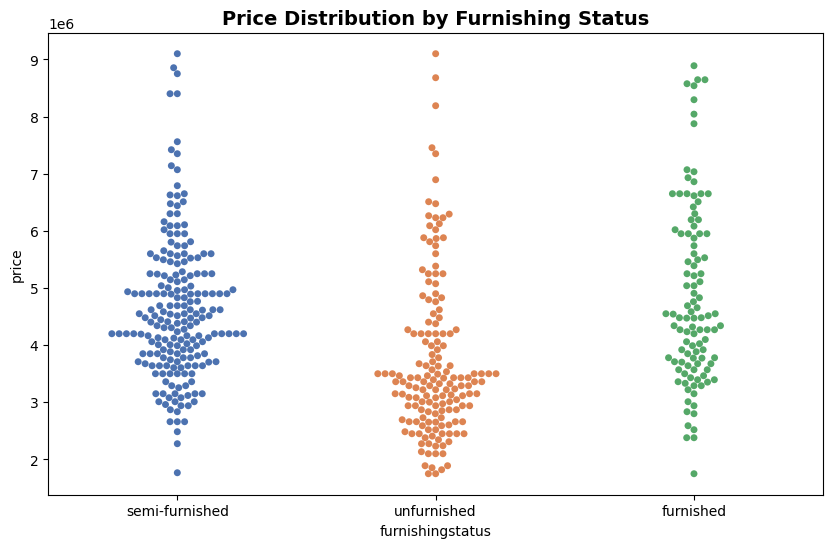

In [26]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='furnishingstatus', y='price', data=df_cleaned, palette="deep")
plt.title("Price Distribution by Furnishing Status", fontsize=14, fontweight="bold")
plt.show()

#Data Transformation


In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    object
 6   guestroom         463 non-null    object
 7   basement          463 non-null    object
 8   hotwaterheating   463 non-null    object
 9   airconditioning   463 non-null    object
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    object
 12  furnishingstatus  463 non-null    object
dtypes: int64(6), object(7)
memory usage: 66.8+ KB


In [28]:
categorical_columns = ["mainroad","guestroom","basement","hotwaterheating",
                       "airconditioning","prefarea","furnishingstatus"]

label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])


print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             463 non-null    int64
 1   area              463 non-null    int64
 2   bedrooms          463 non-null    int64
 3   bathrooms         463 non-null    int64
 4   stories           463 non-null    int64
 5   mainroad          463 non-null    int64
 6   guestroom         463 non-null    int64
 7   basement          463 non-null    int64
 8   hotwaterheating   463 non-null    int64
 9   airconditioning   463 non-null    int64
 10  parking           463 non-null    int64
 11  prefarea          463 non-null    int64
 12  furnishingstatus  463 non-null    int64
dtypes: int64(13)
memory usage: 66.8 KB
None


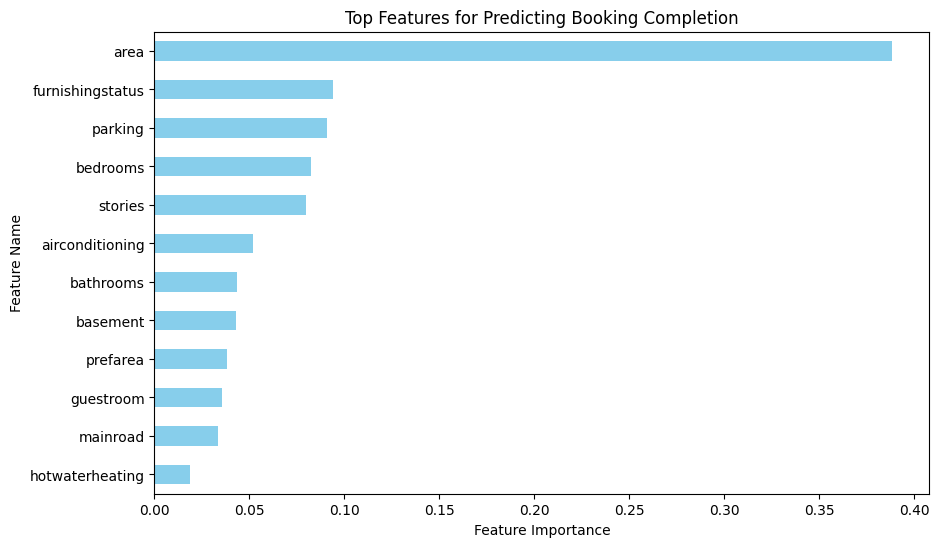

In [29]:
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Booking Completion')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

# Delete Features

In [30]:
df_cleaned.drop(["hotwaterheating"],axis = 1 ,inplace = True)

In [31]:
df_cleaned.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [42]:
df_cleaned['total_rooms'] = df_cleaned['bedrooms'] + df_cleaned['bathrooms'] + df_cleaned['stories']
df_cleaned['area_per_room'] = df_cleaned['area'] / (df_cleaned['total_rooms'] + 1)
df_cleaned['parking_density'] = df_cleaned['parking'] / (df_cleaned['area'] + 1)
df_cleaned['stories_per_bedroom'] = df_cleaned['stories'] / (df_cleaned['bedrooms'] + 1)
df_cleaned['bathroom_bedroom_ratio'] = df_cleaned['bathrooms'] / (df_cleaned['bedrooms'] + 1)
df_cleaned['area_log'] = np.log(df_cleaned['area'] + 1)

df_cleaned['mainroad_guest_combo'] = df_cleaned['mainroad'] * df_cleaned['guestroom']
df_cleaned['basement_prefarea_combo'] = df_cleaned['basement'] * df_cleaned['prefarea']
df_cleaned['aircondition_parking_combo'] = df_cleaned['airconditioning'] * df_cleaned['parking']

df_cleaned['area_mean_by_stories'] = df_cleaned.groupby('stories')['area'].transform('mean')
df_cleaned['bathrooms_mean_by_bedrooms'] = df_cleaned.groupby('bedrooms')['bathrooms'].transform('mean')

num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_rooms', 'area_per_room',
            'parking_density', 'stories_per_bedroom', 'bathroom_bedroom_ratio', 'area_log',
            'area_mean_by_stories', 'bathrooms_mean_by_bedrooms']

scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

df_cleaned = pd.get_dummies(df_cleaned, columns=['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

cols = [col for col in df_cleaned.columns if col != 'price'] + ['price']
df_cleaned = df_cleaned[cols]

print(df_cleaned.head())

        area  bedrooms  bathrooms   stories   parking  total_rooms  \
15  0.687763  1.735836  -0.500988  0.613917  1.822229     0.998801   
16  1.022328  1.735836   1.773105  0.613917  0.532180     1.763173   
18 -0.092888  0.216569   1.773105  0.613917  1.822229     0.998801   
19  0.921958  0.216569   1.773105  0.613917  0.532180     0.998801   
20 -0.249018  0.216569  -0.500988  0.613917  1.822229     0.234429   

    area_per_room  parking_density  stories_per_bedroom  \
15       0.037028         1.232421            -0.121024   
16      -0.015583         0.174083            -0.121024   
18      -0.515384         1.822822             0.580865   
19       0.202751         0.198807             0.580865   
20      -0.382354         1.986812             0.580865   

    bathroom_bedroom_ratio  ...  area_mean_by_stories  \
15               -1.149604  ...             -1.082858   
16                0.774251  ...             -1.082858   
18                1.736179  ...             -1.082858

In [43]:
df_cleaned.shape

(463, 24)

#Create Model


In [44]:
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44,
                                                    shuffle = True)

In [46]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

0.49759710111917577
0.6576002839476179


In [55]:
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r = r2_score(y_test, y_pred1)

print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE = {mae}')
print(f'R = {r}')

MSE = 906695043882.7932
RMSE = 906695043882.7932
MAE = 718558.321894268
R = 0.49759710111917577


In [47]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(model2.score(X_test, y_test))
print(model2.score(X_train, y_train))

-0.1706696775237737
0.9996525935086544


In [48]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(model3.score(X_test, y_test))
print(model3.score(X_train, y_train))

0.5155752285331264
0.9425325515570354


In [49]:
model4 = SVR()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(model4.score(X_test, y_test))
print(model4.score(X_train, y_train))

-0.0014109104122188576
-0.020522111716390734


In [50]:
model5 = Lasso()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(model5.score(X_test, y_test))
print(model5.score(X_train, y_train))

0.49760830144030266
0.6576002835715484


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+12, tolerance: 7.801e+10
  model = cd_fast.enet_coordinate_descent(


In [51]:
model6 = XGBRegressor()
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
print(model6.score(X_test, y_test))
print(model6.score(X_train, y_train))

0.3666492700576782
0.9993708729743958


In [52]:
model7 = CatBoostRegressor()
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)
print(model7.score(X_test, y_test))
print(model7.score(X_train, y_train))

Learning rate set to 0.034638
0:	learn: 1476255.6672312	total: 1.77ms	remaining: 1.76s
1:	learn: 1455401.2706239	total: 3.18ms	remaining: 1.58s
2:	learn: 1435199.4117210	total: 4.45ms	remaining: 1.48s
3:	learn: 1414276.2247228	total: 5.74ms	remaining: 1.43s
4:	learn: 1394097.1706237	total: 7.01ms	remaining: 1.39s
5:	learn: 1375538.3662939	total: 9.02ms	remaining: 1.49s
6:	learn: 1357533.8393052	total: 10.5ms	remaining: 1.5s
7:	learn: 1340250.1742726	total: 11.4ms	remaining: 1.42s
8:	learn: 1321685.7114089	total: 12.8ms	remaining: 1.41s
9:	learn: 1304855.6374421	total: 14.2ms	remaining: 1.4s
10:	learn: 1288740.2443546	total: 15.5ms	remaining: 1.4s
11:	learn: 1274675.5306817	total: 16.9ms	remaining: 1.39s
12:	learn: 1259594.6929725	total: 18.2ms	remaining: 1.38s
13:	learn: 1246048.7277398	total: 19.6ms	remaining: 1.38s
14:	learn: 1231814.5624978	total: 21.1ms	remaining: 1.38s
15:	learn: 1217430.8874060	total: 22.4ms	remaining: 1.38s
16:	learn: 1206401.4734113	total: 23.7ms	remaining: 1.3

In [56]:
import pickle

with open("model House Prices.pkl", "wb") as f:

    pickle.dump(model1, f)